In [3]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Load required packages using pacman::p_load

In [4]:
pacman::p_load("rvest","formattable","dplyr","reactablefmtr","kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’



formattable installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘reactR’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘reactable’, ‘shiny’, ‘tippy’, ‘webshot’



reactablefmtr installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


kableExtra installed



#### define paste0 function as %+%

In [5]:
"%+%" = paste0

#### make countries list

In [6]:
North_America = c("united-states", "canada", "mexico")
Europe = c("germany", "united-kingdom", "france", "italy", "austria",
           "poland", "sweden", "switzerland")
Asia = c("china", "japan", "india", "south-korea", "russia", "indonesia",
         "saudi-arabia", "turkey", "taiwan", "singapore", "thailand")
South_America = c("brazil", "argentina")
africa_countries = c("south-africa")

countries = c(North_America,Europe,Asia,South_America,africa_countries)

#### make data frame and define date as ("%b %Y) format

In [7]:
data = data.frame(
  Date = as.POSIXct(paste0(format(Sys.Date(),"%Y"),"-",rep(1:12),"-01")) %>%
    format(.,"%b %y"))

#### input countries interest information into dataframe

In [8]:
for (i in 1:length(countries)) {
  try({
    id = 'https://take-profit.org/en/statistics/interest-rate/' %+% countries[i] %>%
      read_html() %>%
      html_nodes('table') %>% .[[2]] %>%
      html_table(fill = TRUE) %>%
      select(X1,X2) %>%
      setNames(c(countries[i],"Date")) %>%
      mutate(Date = gsub(x=.$Date, pattern="/",replacement = " ")) %>%
      mutate(`countries[i]` = countries[i] %+% "%") %>%
      .[c(2,1)] %>%
      .[nrow(.):1,]

    data = data %>%
      left_join(id,by="Date")
  })
}

#### use kable extra package to make beautiful dataframe

In [9]:
insttable = data %>%
  mutate(across(-Date,~if_else(is.na(.),"-",paste0(.,"%")))) %>%
  setNames(gsub(x=colnames(data),"-"," ") %>%
             toupper())

In [ ]:
insttable %>%
  kbl(.,align = "c") %>%
  kable_paper() %>%
  add_header_above(c(" ",
                     "North America" = length(North_America),
                     "Europe" = length(Europe),
                     "Asia" = length(Asia),
                     "South America" = length(South_America),
                     "Africa" = length(africa_countries)
  ))

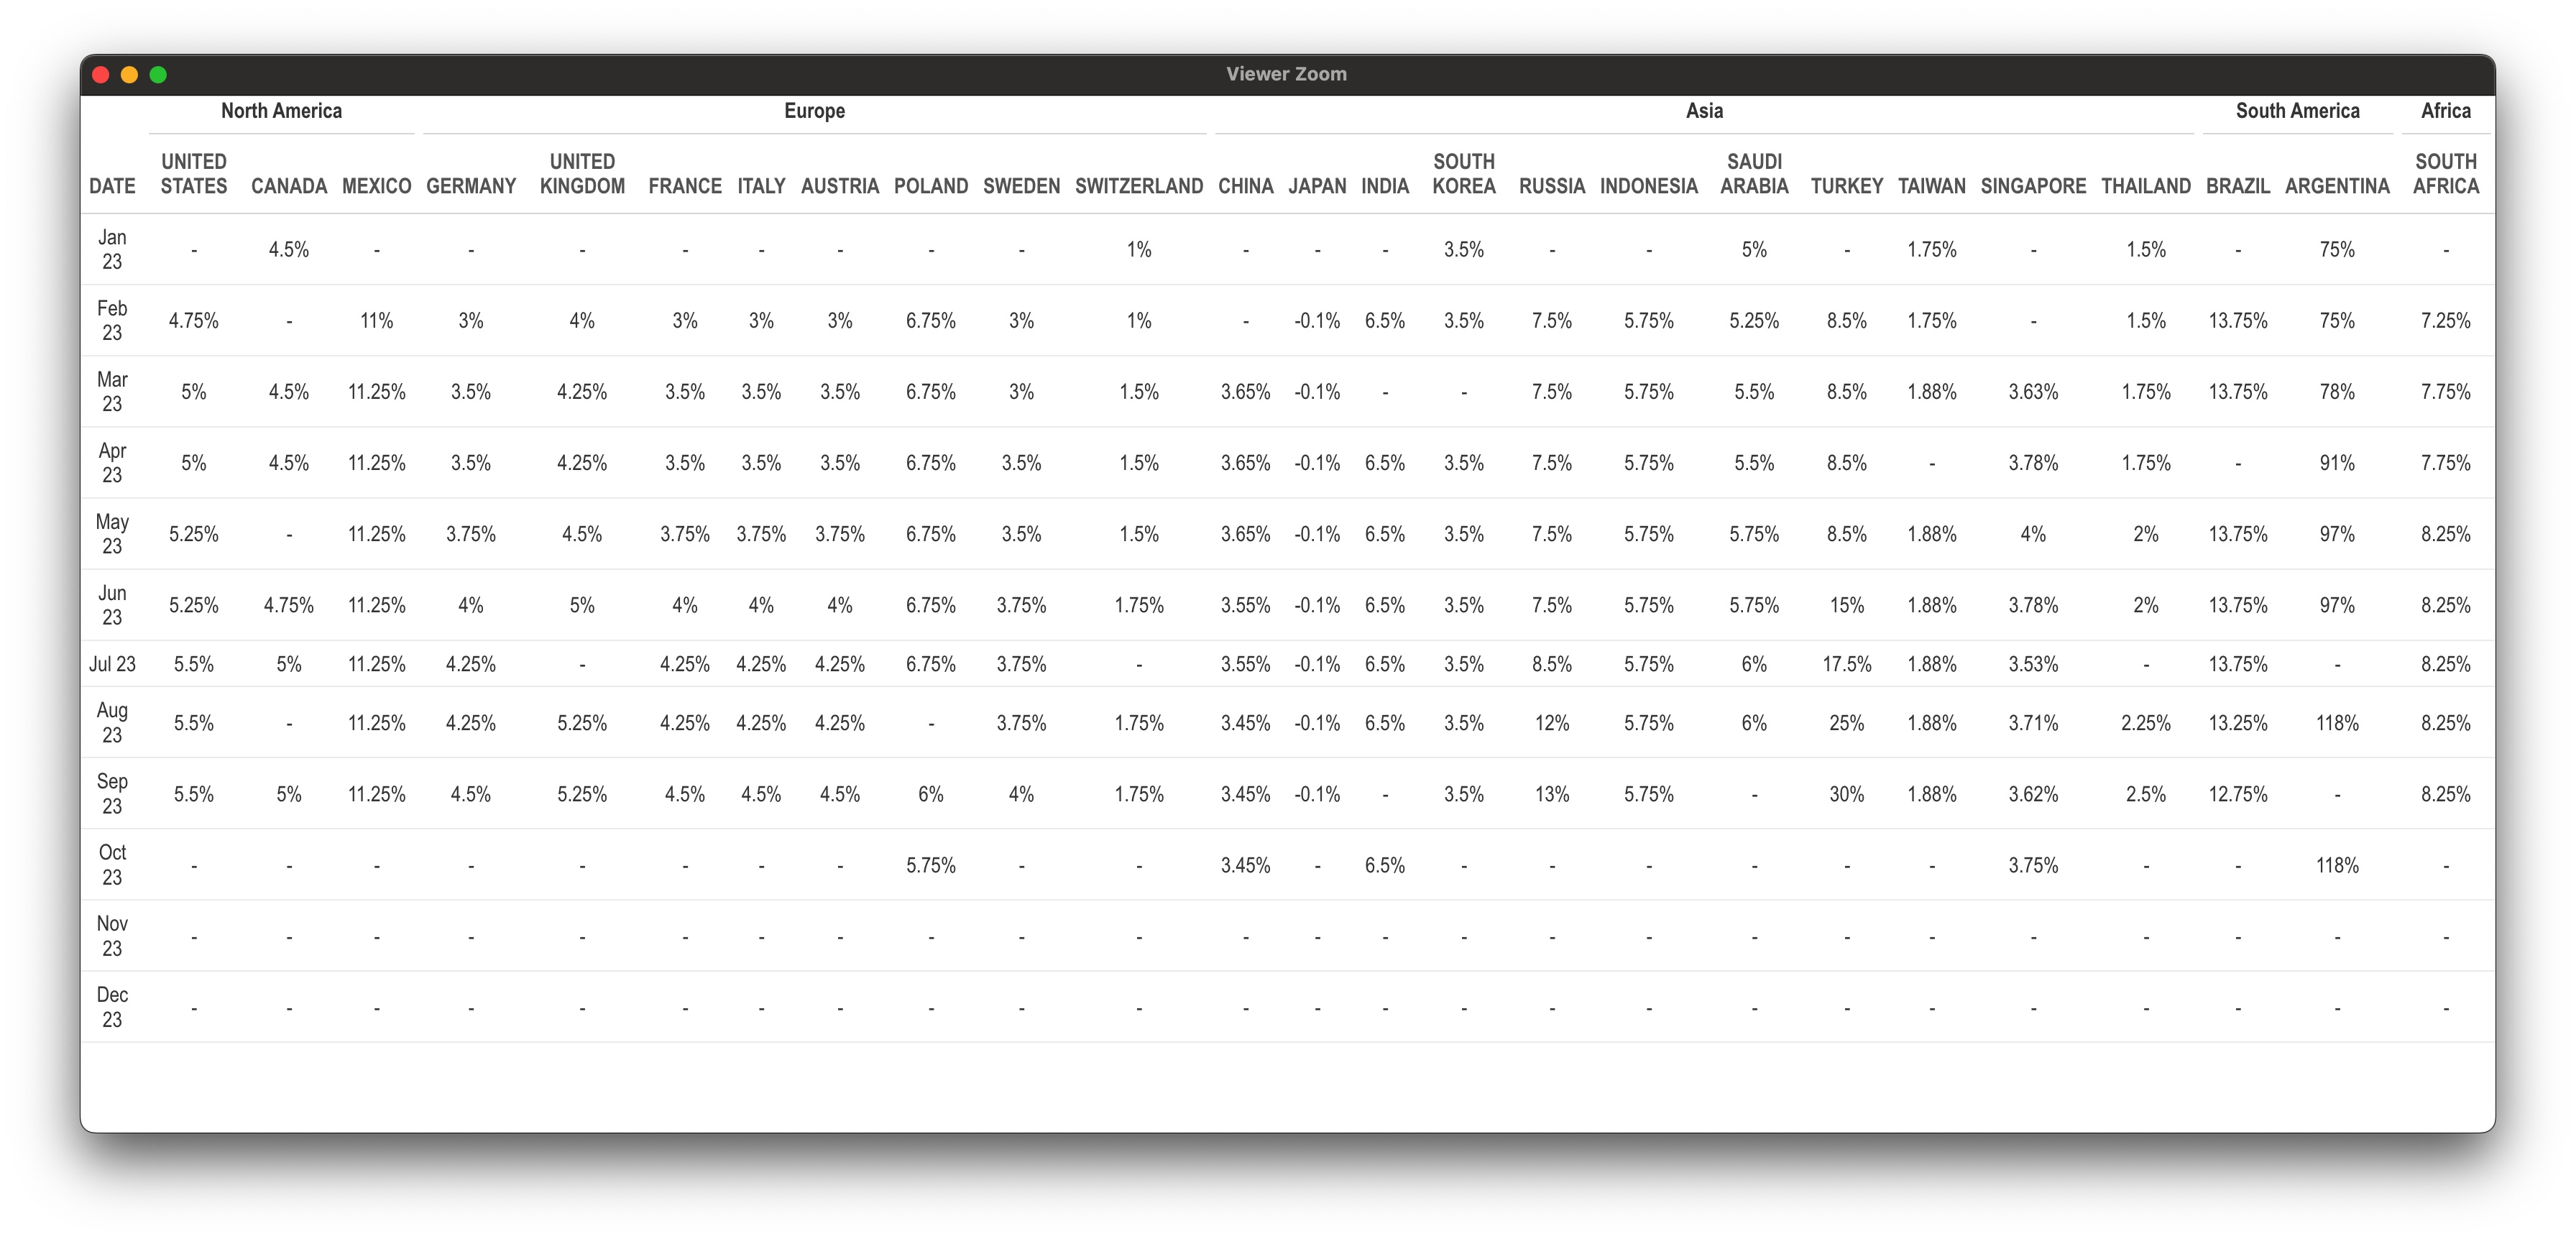